In [125]:
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
import numpy as np

from pydmd import HODMD,DMD

In [126]:
#Load data from Jesse
gradients = np.loadtxt('hcp_gradient_ts_100subjs_1195timepoinnts.txt').T
gradients.shape

(9, 119500)

In [127]:
# There are 100 subjects. Reshape so we have num grads x num timepoints x num subjects
num_grads = gradients.shape[0]
num_subjects=100
grads_bysub = np.reshape(gradients,(9,-1,num_subjects))

In [128]:
# Take the first subject as a test case
X = grads_bysub[:,:,0]
X.shape

(9, 1195)

In [136]:
# Initiate DMD class- no svd rank specification means it computes the optimal rank
dmd = DMD()

# Compute DMD on input data
dmd.fit(X)

# print shapes of A matrix and modes
A = dmd.atilde
print('Shape of A matrix = {}'.format(A.shape))
modes = dmd.modes
print('Shape of modes matrix = {}'.format(modes.shape))

# reconstructed data - take only real parts since input data is real-valued
reconstructed = dmd.reconstructed_data.real


Shape of A matrix = (3, 3)
Shape of modes matrix = (9, 3)


Eigenvalue (0.033208731734414326+0.034969467689600554j): distance from unit circle 0.9517746587995242
Eigenvalue (0.033208731734414326-0.034969467689600554j): distance from unit circle 0.9517746587995242
Eigenvalue (0.024333718774999197+0j): distance from unit circle 0.9756662812250008


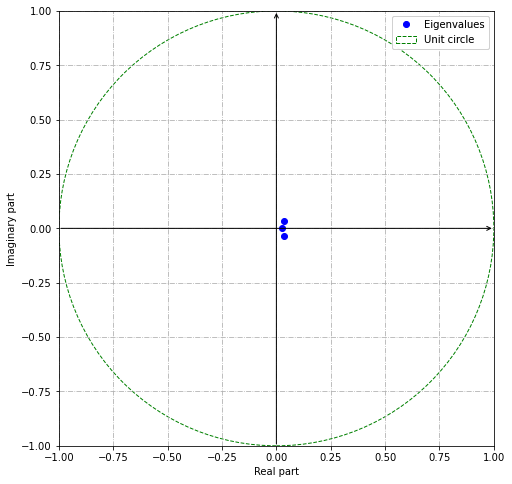

In [138]:
#plot eigenvalues. If eigenvalye is on unit circle, corresponding mode is stable. 
#If inside, it will converge. Outside, diverge

for eig in dmd.eigs:
    print('Eigenvalue {}: distance from unit circle {}'.format(eig, np.abs(np.sqrt(eig.imag**2+eig.real**2) - 1)))

dmd.plot_eigs(show_axes=True, show_unit_circle=True)

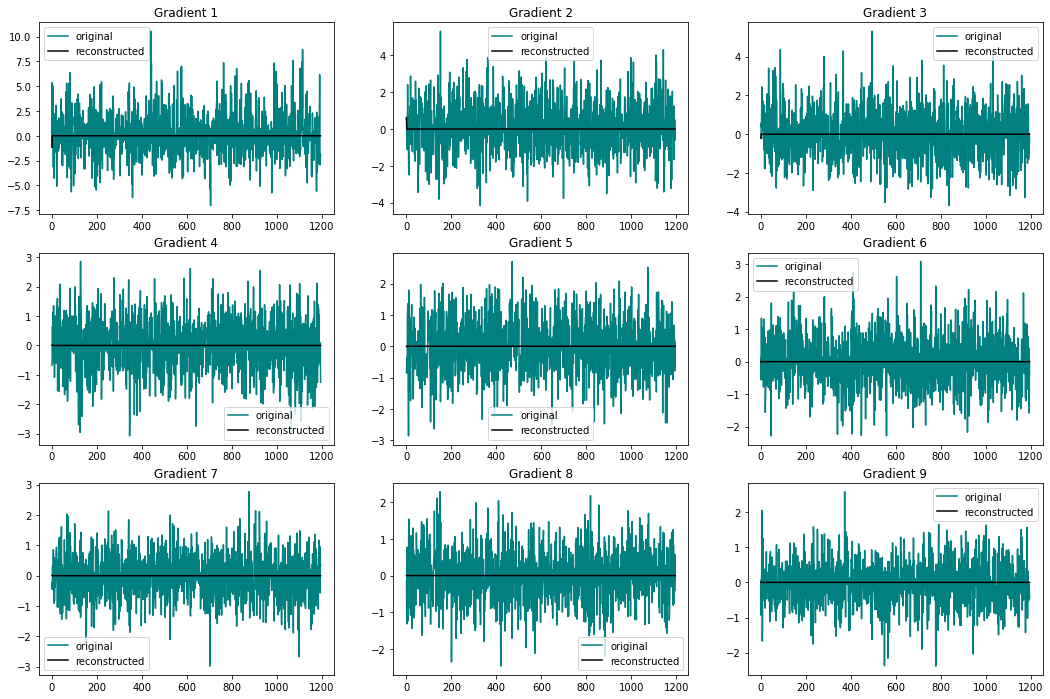

In [141]:
fig = plt.figure(figsize=(18,12))

for grad in range(1,num_grads+1):
    plt.subplot(3, 3, grad)
    plt.plot(X[grad-1,:],c='teal',label='original')
    plt.plot(reconstructed[grad-1,:],c='k',label='reconstructed')
    plt.title('Gradient {}'.format(grad))
    plt.legend()

In [142]:
# Augment data according to Brunton et al., 2014
# h is the smallest integer s.t. hn > 2m. Stack time shifted versions of it until the first dimension is n*h.

m = X.shape[1]
n = X.shape[0]
h = int(np.ceil(2*m/n))

colsstart = 0
colsend = m-h
Xaug = X[:,colsstart:colsend]
while Xaug.shape[0]<n*h:
    colsstart += 1
    colsend +=1
    Xaug = np.vstack((Xaug,X[:,colsstart:colsend]))

In [144]:
# Perform classic DMD on the augmented matrix
dmd_aug = DMD()

# Compute DMD on input data
dmd_aug.fit(Xaug)

# print shapes of A matrix and modes
A = dmd_aug.atilde
print('Shape of A matrix = {}'.format(A.shape))
modes = dmd_aug.modes
print('Shape of modes matrix = {}'.format(modes.shape))

# reconstructed data - take only real parts since input data is real-valued
reconstructed_aug = dmd_aug.reconstructed_data.real

Shape of A matrix = (52, 52)
Shape of modes matrix = (2394, 52)


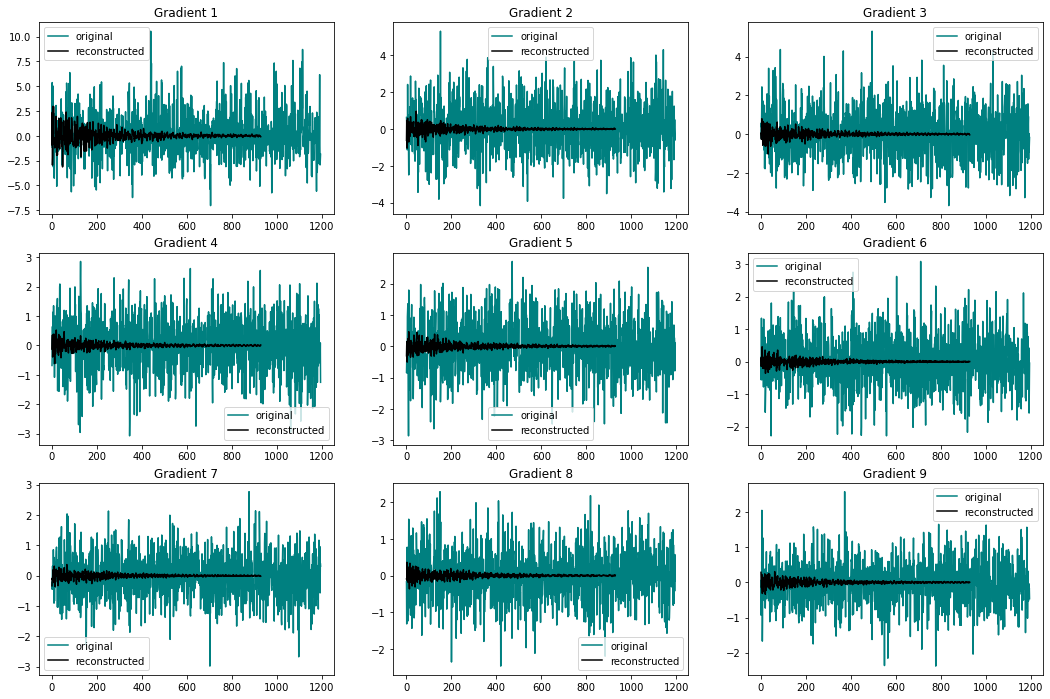

In [145]:
fig = plt.figure(figsize=(18,12))

for grad in range(1,num_grads+1):
    plt.subplot(3, 3, grad)
    plt.plot(X[grad-1,:],c='teal',label='original')
    plt.plot(reconstructed_aug[grad-1,:],c='k',label='reconstructed')
    plt.title('Gradient {}'.format(grad))
    plt.legend()

In [149]:
# Perform higher-order DMD on original data.
# This method allows to apply the DMD also when the dimension of the snapshots is less than the number of snapshots


hodmd = HODMD(svd_rank=0, exact=True, opt=True).fit(X)

# print shapes of A matrix and modes
A = hodmd.atilde
print('Shape of A matrix = {}'.format(A.shape))
modes = hodmd.modes
print('Shape of modes matrix = {}'.format(modes.shape))

# reconstructed data - take only real parts since input data is real-valued
reconstructed_ho = hodmd.reconstructed_data.real
reconstructed_ho.shape

Shape of A matrix = (3, 3)
Shape of modes matrix = (9, 3)


(9, 1195)

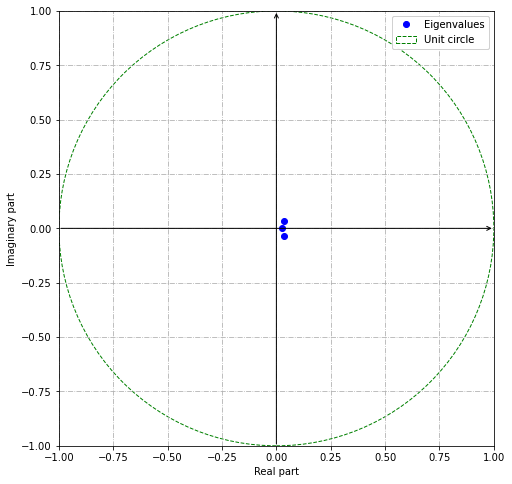

In [150]:
hodmd.plot_eigs()

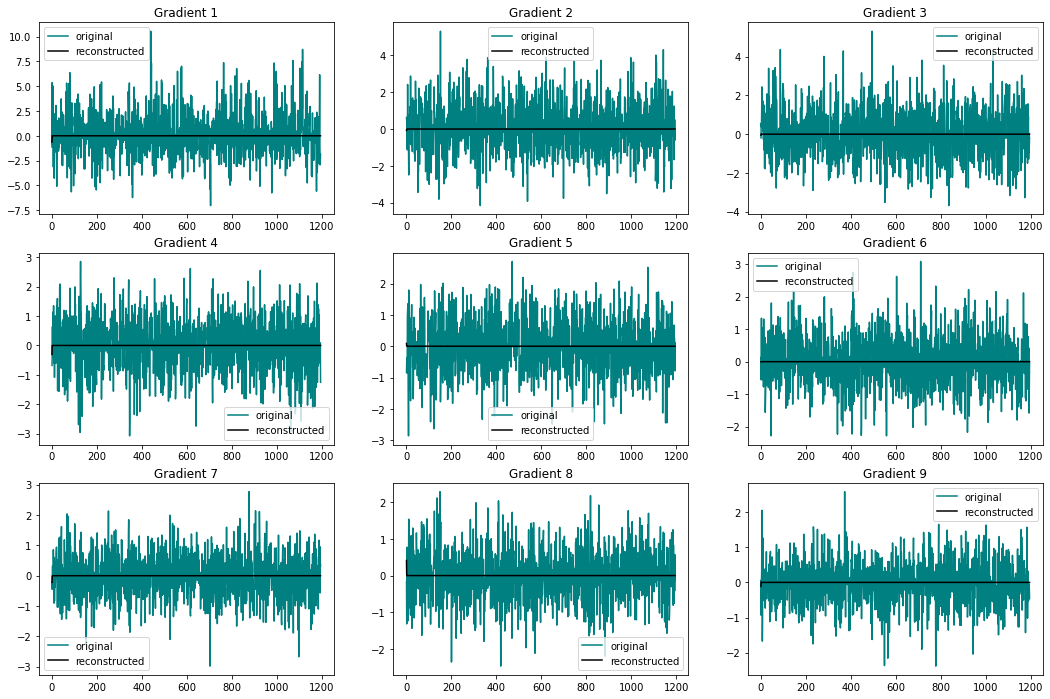

In [151]:
fig = plt.figure(figsize=(18,12))

for grad in range(1,num_grads+1):
    plt.subplot(3, 3, grad)
    plt.plot(X[grad-1,:],c='teal',label='original')
    plt.plot(reconstructed_ho[grad-1,:],c='k',label='reconstructed')
    plt.title('Gradient {}'.format(grad))
    plt.legend()